<a href="https://colab.research.google.com/github/gannannavelorange/Project/blob/master/src/question2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/gannannavelorange/Project

Cloning into 'Project'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 28 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (28/28), done.


In [ ]:
cd Project/src

/content/Project/src


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as so
import pandas as pd
import math
from scipy.stats import norm
import csv


In [ ]:
def gbs(option_type, fs, x, t, r, b, v):
    t__sqrt = math.sqrt(t)
    d1 = (math.log(fs / x) + (b + (v * v) / 2) * t) / (v * t__sqrt)
    d2 = d1 - v * t__sqrt

    #if option_type == "c":
    if option_type == 1:
        
        value = fs * math.exp((b - r) * t) * norm.cdf(d1) - x * math.exp(-r * t) * norm.cdf(d2)
        delta = math.exp((b - r) * t) * norm.cdf(d1)
        gamma = math.exp((b - r) * t) * norm.pdf(d1) / (fs * v * t__sqrt)
        theta = -(fs * v * math.exp((b - r) * t) * norm.pdf(d1)) / (2 * t__sqrt) - (b - r) * fs * math.exp(
            (b - r) * t) * norm.cdf(d1) - r * x * math.exp(-r * t) * norm.cdf(d2)
        vega = math.exp((b - r) * t) * fs * t__sqrt * norm.pdf(d1)
        rho = x * t * math.exp(-r * t) * norm.cdf(d2)
    else:
      
        value = x * math.exp(-r * t) * norm.cdf(-d2) - (fs * math.exp((b - r) * t) * norm.cdf(-d1))
        delta = -math.exp((b - r) * t) * norm.cdf(-d1)
        gamma = math.exp((b - r) * t) * norm.pdf(d1) / (fs * v * t__sqrt)
        theta = -(fs * v * math.exp((b - r) * t) * norm.pdf(d1)) / (2 * t__sqrt) + (b - r) * fs * math.exp(
            (b - r) * t) * norm.cdf(-d1) + r * x * math.exp(-r * t) * norm.cdf(-d2)
        vega = math.exp((b - r) * t) * fs * t__sqrt * norm.pdf(d1)
        rho = -x * t * math.exp(-r * t) * norm.cdf(-d2)

    
                                                        
    
    return value, delta, gamma, theta, vega, rho

In [ ]:
'''
#a=gbs("c", 2900, 2900,0.39285, 0.025, 0, 0.136015)
a=gbs(1, 2900, 2900,0.39285, 0.025, 0, 0.136015)
print(a)

SyntaxError: ignored

In [ ]:
0.26984
aa=gbs(0, 444.45,150,0.26984,0.0025, 0.0025, 0.8027)[0]

print(aa)

0.1514830968765397


In [ ]:
#ATM volatility
def init_vol(t,C,F):
  v=2/math.sqrt(t)*norm.ppf(1/2*(C/F+1))
  return v

In [ ]:
def _approx_implied_vol(option_type, fs, x, t, r, b, cp):
    

    ebrt = math.exp((b - r) * t)
    ert = math.exp(-r * t)

    a = math.sqrt(2 * math.pi) / (fs * ebrt + x * ert)

    if option_type == 1:
        payoff = fs * ebrt - x * ert
    else:
        payoff = x * ert - fs * ebrt

    b = cp - payoff / 2
    c = (payoff ** 2) / math.pi

    v = (a * (b + math.sqrt(b ** 2 + c))) / math.sqrt(t)

    return v

In [ ]:
ATM= _approx_implied_vol(1, 2900, 2900, 0.39285, 0.025, 0, 98.6)
print(ATM)

0.13731588717811868


In [ ]:
# Call price=98.6 Future price=2900
ATMvol=init_vol(0.39285,98.6,2900)
print(ATMvol)

0.1360150517495224


In [ ]:
def getdata():
  with open('Data.csv') as file:
      reader=csv.reader(file)
      rows=[row for row in reader]
      col0=[row[0] for row in rows[1:42]]
      col0=[float(c) for c in col0] # Strike
      col1=[row[1] for row in rows[1:42]]
      col1=[float(c) for c in col1] # Call price
      col2=[row[1] for row in rows[1:42]]
      col2=[float(c) for c in col2] # Put price
      
  return col0,col1,col2

In [ ]:
d=getdata()[1]
print(d)

In [ ]:
#define an error function
def error_function(v,option_type, fs, x, t, r, b,theo_price):
  #gbm.vol_ratio = vol
  gbs_price=gbs(option_type, fs, x, t, r, b, v)
  return np.abs(theo_price - gbs_price[0])   #x is the x[i]

In [ ]:
def implied_volatility(option_type, fs, x, t, r, b,theo_price):
  initial =ATMvol#initial guess
  return so.fmin(error_function, initial, args = (option_type, fs, x, t, r, b,theo_price), disp = 0)[0]

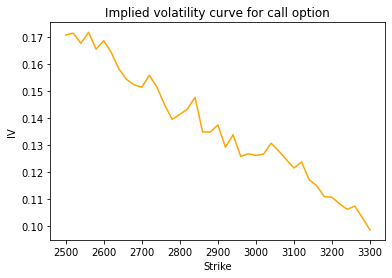

In [ ]:
strike=getdata()[0]
callprice=getdata()[1]
putprice=getdata()[2]
iv=[]
ivp=[]
for i in range(0,41):
  iv.append(implied_volatility(1,2900,strike[i],0.39285, 0.025, 0,callprice[i]))

  #iv.append(implied_volatility(1,2900,strike[i],0.25, 0.025, 0, callprice[i]))
  ivp.append(implied_volatility(3,2900,strike[i],0.39285, 0.025, 0, putprice[i]))
#print(iv)


plt.plot(strike,iv,'orange')
plt.xlabel('Strike')
plt.ylabel('IV')
plt.title('Implied volatility curve for call option')
#plt.legend()
plt.show()

In [ ]:
plt.plot(strike,ivp,'blue')
plt.xlabel('Strike')
plt.ylabel('IV')
plt.title('Implied volatility curve for put option')
#plt.legend()
plt.show()

In [ ]:

ir= 0.025
T=0.39285
F=2900 

arbitrage=[]
for i in range(0,41):
  #arbitrage.append(strike[i]*np.exp(-ir*T)-F*np.exp(-ir*T)-putprice[i]+callprice[i])
  arbitrage.append(strike[i]*np.exp(-ir*T)-100*F-putprice[i]+callprice[i])
print(arbitrage)
  

[-396.090728389885, -376.286191970391, -356.4816555508969, -336.6771191314024, -316.87258271190825, -297.0680462924138, -277.2635098729197, -257.45897345342564, -237.65443703393112, -217.84990061443705, -198.04536419494252, -178.24082777544845, -158.43629135595438, -138.63175493645988, -118.82721851696579, -99.02268209747126, -79.21814567797719, -59.41360925848312, -39.609072838988595, -19.804536419494525, 0.0, 19.80453641949407, 39.60907283898814, 59.413609258482666, 79.21814567797674, 99.02268209747126, 118.82721851696533, 138.6317549364594, 158.43629135595393, 178.240827775448, 198.04536419494252, 217.8499006144366, 237.65443703393066, 257.4589734534252, 277.26350987291926, 297.0680462924138, 316.87258271190785, 336.6771191314019, 356.48165555089645, 376.2861919703905, 396.09072838988504]


In [ ]:
T=0.26984
IR=0.0025

ar=540*np.exp(-0.0025*0.26984)-444.45-99.95+9.6
print(ar)

4.835838845367752


In [ ]:
def getdata1():
  with open('AAPL.csv') as file:
      reader=csv.reader(file)
      rows=[row for row in reader]
      col0=[row[0] for row in rows[1:59]]
      col0=[float(c) for c in col0] # Strike
      col1=[row[1] for row in rows[1:59]]
      col1=[float(c) for c in col1] # Call price
      
      
  return col0,col1

In [ ]:
strike1=getdata1()[0]
callprice1=getdata1()[1]
for i in range(0,58):
  print(strike1[i])

In [ ]:
strike1=getdata1()[0]
callprice1=getdata1()[1]
iv1=[]
for i in range(0,58):
  iv1.append(implied_volatility(1,444.45,strike1[i],0.26984, 0.0025, 0.0025,callprice1[i]))
  #iv.append(implied_volatility(1,2900,strike[i],0.39285, 0.025, 0.025,callprice[i]))
  #ivp.append(implied_volatility(0,2900,strike[i],0.39285, 0.025, 0,putprice[i]))
print(iv1)


plt.plot(strike1,iv1,'orange')
plt.xlabel('strike')
plt.ylabel('iv')
plt.title('iv curve')
plt.legend()
plt.show()

In [ ]:
i = implied_volatility(1, 2900, 2900,0.39285, 0.025, 0,98.6)
print(i)